Reconsider the household expenditure model that appears in the text, and the data for which are in the file $food.dat$. That is, we have the model
$$ y_i = \beta_1 + \beta_2 x_i + e_i$$

where $y_i$ is food expenditure for the $i$th household and $x_i$ is income. . Find generalized least squares estimates for $\beta_1$ and $\beta_2$ under the assumptions 
- $\text{var}(e_i) = \sigma^2 \sqrt{x_i}$
- $\text{var}(e_i) = \sigma^2 x^2_i$
- $\text{var}(e_i) = \sigma^2 \ln(x_i)$


Comment on the sensitivity of the estimates and their standard errors to the hetero- skedastic specification. For each case, use the White N 􏰆 R2 statistic and the residuals from the transformed model to test whether heteroskedasticity has been eliminated.


The file br2.dat contains data on 1080 houses sold in Baton Rouge, Louisiana during mid-2005. We will be concerned with the selling price (PRICE), the size of the house in square feet (SQFT ), and the age of the house in years (AGE). Define a new variable that measures house size in terms of hundreds of square feet, SQFT100 1⁄4 SQFT=100.

(a) Find least squares estimates of the following equation and save the residuals:

$$ \ln(PRICE) = \beta_1 + \beta_2 SQFT100 + \beta_3 AGE + \beta_4 AGE^2 + e$$

In [1]:
clear all

use https://www.stata.com/data/s4poe4/br2.dta

gen log_price = log(price)
gen age2 = age^2
gen sqft100 = sqft/100

reg log_price sqft100 age age2

predict residuals, resid








      Source |       SS           df       MS      Number of obs   =     1,080
-------------+----------------------------------   F(3, 1076)      =    865.49
       Model |  209.891557         3  69.9638522   Prob > F        =    0.0000
    Residual |  86.9808097     1,076  .080837184   R-squared       =    0.7070
-------------+----------------------------------   Adj R-squared   =    0.7062
       Total |  296.872366     1,079  .275136577   Root MSE        =    .28432

------------------------------------------------------------------------------
   log_price |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
     sqft100 |   .0387624   .0008693    44.59   0.000     .0370566    .0404682
         age |  -.0175549   .0013565   -12.94   0.000    -.0202165   -.0148932
        age2 |   .0001734   .0000227     7.65   0.000     .0001289    .0002178
       _cons |   11.11959   .0274129   405.6

(b) Plot the residuals against (i) $AGE$ and (ii) $SQFT100$. Is there any evidence of heteroskedasticity?

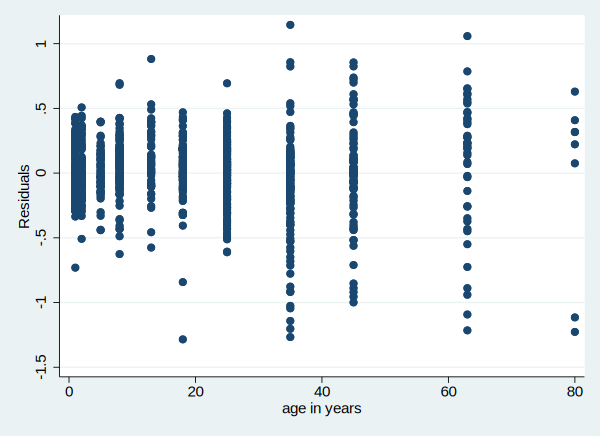

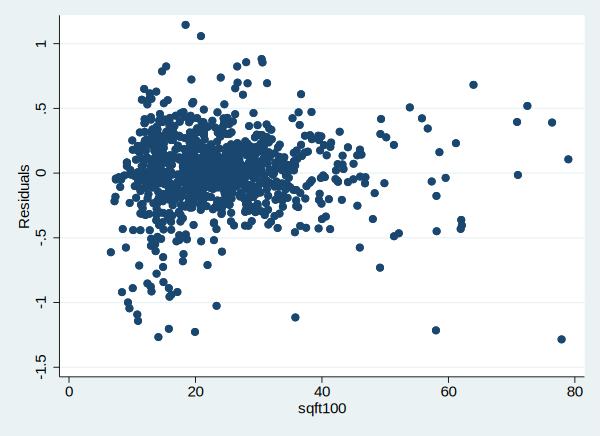

In [6]:
scatter residuals age
scatter residuals sqft100

AGE doesn't seem to be a problem. There is some pattern of heteroskedasticity in $SQFT100$

Test for heteroskedasticity using a Breusch-Pagan test and the variables $AGE$ and $SQFT100$. Is there evidence of heteroskedasticity at a $1\%$ level of significance?

In [13]:
qui reg log_price sqft100 age 
hettest




Breusch-Pagan / Cook-Weisberg test for heteroskedasticity 
         Ho: Constant variance
         Variables: fitted values of log_price

         chi2(1)      =    36.85
         Prob > chi2  =   0.0000


Yes, there is evidence of heteroskedasticity

(d) Estimate the variance funtion $\sigma^2_i = \exp(\alpha_1 + \alpha_2AGE_i + \alpha_3 SQFT100_i)$ and report the results. Use the robust standard error option and comment on the effects of $AGE$ and $SQFT100$ on the variance. 


(e) Use the estimated variance function in (d) to find variance estimates $\hat{\sigma}^2_i, i = 1, 2, \cdots, 1080,$ and use those estiamtes to find generalized least squares estimates of the equation in (a).

(f) Use a table format to report estimates and standard errors for the model in part (a), from the following estimation techniques. Comment on any differences and similarities. 
- (i) Least squares
- (ii) Least squares with heteroskedasticity-robust standard errors
- (iii) Generalized least squares from part (e)
- (iv) Generalized least sqaures from part (e), but with robust standard errors

(g) Do the transformed residuals from the transformed regression in part (e) show evidence of heteroskedasticirty? Use a Breusch-Pagan test with variables $AGE$ and $SQFT100$
